# AI challenge 数据集预处理
构建 b 域数据集, b 域数据集目前是 19 类样本再加一类其他

## 构建 AI challenge 0-1 数据集

In [2]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2 as cv

In [9]:
# 19 类在 A 域种对应的标号, 另外一类为其他
class_name = {'apple_healthy': 3,
              'apple_scab': 0,
              'cherry_healthy': 6,
              'cherry_powdery mildew': 5,
              'grape_black_rot': 11,
              'grape_healthy': 14,
              'peach_bacterial_spot': 16,
              'peach_healthy': 17,
              'potato_early_blight': 20,
              'potato_late_blight': 21,
              'strawberry_healthy': 27,
              'strawberry_scorch': 26,
              'tomato_YLCV_virus': 35,
              'tomato_early_blight':29,
              'tomato_healthy':37,
              'tomato_late_blight':30,
              'tomato_leaf_mold':31,
              'tomato_septoria_leaf_spot': 32,
              'tomato_spider_mite_damage': 33}
def read_imgs(x_data, y_data, file_dir, total_num):
    '''
    从文件夹中读取文件到 x_data, y_data。
    这里读进来是 float
    '''
    img_count = 0
    for cla in sorted(class_name.keys()): # 19 类
        for file_name in os.listdir(os.path.join(file_dir, cla)):
            print("\rreading...:{:d}/{:d}".format(img_count + 1, total_num),
                  end='')
            file_path = os.path.join(file_dir, cla, file_name)
            img = cv.imread(file_path)  # 默认是 BGR 格式
            # 压缩为 256 * 256
            img = cv.resize(img, (256, 256))
            # 转换为 float
            img = img.astype(np.float) / 255 
            # 添加高斯噪声
            img = img + np.random.randn(256, 256, 3) * 0.1
            # img = cv.cvtColor(img, cv.COLOR_BGR2RGB)  # 转化为 RGB 格式
            # 变为 (3, 256, 256) 的 RGB 图像
            img = np.array([img[:, :, 2], img[:, :, 1], img[:, :, 0]])
            x_data[img_count, :, :, :] = img
            y_data[img_count] = class_name[cla]
            img_count += 1
    
def save_file(save_path, x_data, y_data):
    '''
    保存数据文件
    '''
    with h5py.File(save_path, 'w') as f_name:
        f_name['X'] = x_data
        f_name['Y'] = y_data

In [10]:
# 得到训练集 h5 文件
path_train = '/media/lingang/d/chris/graduate_thesis/raw_dataset/AI_challenge_B_domain/train'
x_data = np.zeros([17677, 3, 256, 256], dtype=np.float)  # 有 num 张图片
y_data = np.zeros([17677], dtype=np.uint8)
read_imgs(x_data, y_data, path_train, 17677)
save_path = '/media/lingang/d/chris/graduate_thesis/dataset/plant_disease_b/train_data.h5'
save_file(save_path, x_data, y_data)

reading...:17677/17677

In [11]:
# 得到验证集和测试集的 h5 文件
path_val_test = '/media/lingang/d/chris/graduate_thesis/raw_dataset/AI_challenge_B_domain/val_test'
save_path_val = '/media/lingang/d/chris/graduate_thesis/dataset/plant_disease_b/val_data.h5'
save_path_test = '/media/lingang/d/chris/graduate_thesis/dataset/plant_disease_b/test_data.h5'

num = 2521
x_data = np.zeros([num, 3, 256, 256], dtype=np.float)  # 有 num 张图片
y_data = np.zeros([num], dtype=np.uint8)  
read_imgs(x_data, y_data, path_val_test, num)  # 不用函数返回的原因是: 少一次拷贝

# 随机打乱 x_data y_data, 固定随机数种子，保证每次都一样
seq = list(range(num))
np.random.seed(1)
np.random.shuffle(seq)
num_val = int(num / 2)
num_test = int(num - num_val)

# 构建验证数据
x_val_data = np.zeros([num_val, 3, 256, 256], dtype=np.float)
y_val_data = np.zeros([num_val], dtype=np.uint8)
for i in range(num_val):
    x_val_data[i] = x_data[seq[i]]
    y_val_data[i] = y_data[seq[i]]

# 构建测试数据
x_test_data = np.zeros([num_test, 3, 256, 256], dtype=np.float)
y_test_data = np.zeros([num_test], dtype=np.uint8)
for i in range(num_test):
    x_test_data[i] = x_data[seq[i + num_val]]
    y_test_data[i] = y_data[seq[i + num_val]]
# 保存为 h5 文件
print("\nsaving...")
save_file(save_path_val, x_val_data, y_val_data)
save_file(save_path_test, x_test_data, y_test_data)
print("finished!")

reading...:2521/2521
saving...
finished!


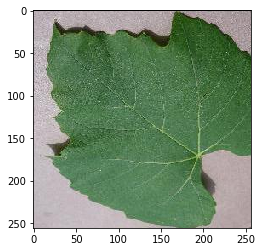

In [5]:
# 查看数据集
save_path_val = '/media/lingang/d/chris/graduate_thesis/dataset/plant_disease_a/val_data.h5'
with h5py.File(save_path_val, 'r') as f_name:
    xx = f_name['X']
    yy = f_name['Y'] 
    ans = xx[0]

img = np.zeros([256, 256, 3], dtype=np.float32)
img[:,:,0] = ans[0,:,:]
img[:,:,1] = ans[1,:,:]
img[:,:,2] = ans[2,:,:]
plt.figure()
plt.imshow(img)
plt.show()


## 构建 AI challenge 0-255 数据集
加不同的噪声

In [1]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2 as cv

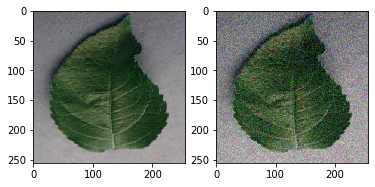

In [71]:
path = '/media/lingang/d/chris/graduate_thesis/raw_dataset/AI_challenge_B_domain/train/apple_healthy/0a59f2fdfd651f340f2554f29b497efb.jpg'
img = cv.imread(path)  # 默认是 BGR 格式
# 压缩为 256 * 256
img = cv.resize(img, (256, 256))
img_noise = img_gaussian(img)

plt.subplot(1,2,1)
plt.imshow(img)
plt.subplot(1,2,2)
plt.imshow(img_noise)

In [2]:
# 19 类在 A 域种对应的标号, 另外一类为其他
class_name = {'apple_healthy': 3,
              'apple_scab': 0,
              'cherry_healthy': 6,
              'cherry_powdery mildew': 5,
              'grape_black_rot': 11,
              'grape_healthy': 14,
              'peach_bacterial_spot': 16,
              'peach_healthy': 17,
              'potato_early_blight': 20,
              'potato_late_blight': 21,
              'strawberry_healthy': 27,
              'strawberry_scorch': 26,
              'tomato_YLCV_virus': 35,
              'tomato_early_blight':29,
              'tomato_healthy':37,
              'tomato_late_blight':30,
              'tomato_leaf_mold':31,
              'tomato_septoria_leaf_spot': 32,
              'tomato_spider_mite_damage': 33}

def img_gaussian(img, mu = 5, sigma=20):
    '''
    给图片加上高斯噪声
    '''
    img_int16 = img.astype(np.int16)
    img_noise = img_int16 + (mu + np.random.randn(*img.shape) * sigma).astype(np.int16)
    img_noise = np.clip(img_noise, 0, 255)
    out = img_noise.astype(np.uint8)
    return out

def read_imgs(x_data, y_data, file_dir, total_num):
    '''
    从文件夹中读取文件到 x_data, y_data。
    这里读进来是 float
    '''
    img_count = 0
    for cla in sorted(class_name.keys()): # 19 类
        for file_name in os.listdir(os.path.join(file_dir, cla)):
            print("\rreading...:{:d}/{:d}".format(img_count + 1, total_num),
                  end='')
            file_path = os.path.join(file_dir, cla, file_name)
            img = cv.imread(file_path)  # 默认是 BGR 格式
            # 压缩为 256 * 256
            img = cv.resize(img, (256, 256))

            ####################################################
            # 添加高斯噪声
            img = img_gaussian(img)
            ####################################################

            # img = cv.cvtColor(img, cv.COLOR_BGR2RGB)  # 转化为 RGB 格式
            # 变为 (3, 256, 256) 的 RGB 图像
            img = np.array([img[:, :, 2], img[:, :, 1], img[:, :, 0]])
            x_data[img_count, :, :, :] = img
            y_data[img_count] = class_name[cla]
            img_count += 1
    
def save_file(save_path, x_data, y_data):
    '''
    保存数据文件
    '''
    with h5py.File(save_path, 'w') as f_name:
        f_name['X'] = x_data
        f_name['Y'] = y_data

In [3]:
# 得到训练集 h5 文件
path_train = '/media/lingang/d/chris/graduate_thesis/raw_dataset/AI_challenge_B_domain/train'
x_data = np.zeros([17677, 3, 256, 256], dtype=np.uint8)  # 有 num 张图片
y_data = np.zeros([17677], dtype=np.uint8)
read_imgs(x_data, y_data, path_train, 17677)
save_path = '/media/lingang/d/chris/graduate_thesis/dataset/plant_disease_b_0255/train_data_noise_5_20.h5'
save_file(save_path, x_data, y_data)

reading...:17677/17677

In [4]:
# 得到验证集和测试集的 h5 文件
path_val_test = '/media/lingang/d/chris/graduate_thesis/raw_dataset/AI_challenge_B_domain/val_test'

save_path_val = '/media/lingang/d/chris/graduate_thesis/dataset/plant_disease_b_0255/val_data_noise_5_20.h5'
save_path_test = '/media/lingang/d/chris/graduate_thesis/dataset/plant_disease_b_0255/test_data_noise_5_20.h5'

num = 2521
x_data = np.zeros([num, 3, 256, 256], dtype=np.uint8)  # 有 num 张图片
y_data = np.zeros([num], dtype=np.uint8)  
read_imgs(x_data, y_data, path_val_test, num)  # 不用函数返回的原因是: 少一次拷贝

# 随机打乱 x_data y_data, 固定随机数种子，保证每次都一样
seq = list(range(num))
np.random.seed(1)
np.random.shuffle(seq)
num_val = int(num / 2)
num_test = int(num - num_val)

# 构建验证数据
x_val_data = np.zeros([num_val, 3, 256, 256], dtype=np.uint8)
y_val_data = np.zeros([num_val], dtype=np.uint8)
for i in range(num_val):
    x_val_data[i] = x_data[seq[i]]
    y_val_data[i] = y_data[seq[i]]

# 构建测试数据
x_test_data = np.zeros([num_test, 3, 256, 256], dtype=np.uint8)
y_test_data = np.zeros([num_test], dtype=np.uint8)
for i in range(num_test):
    x_test_data[i] = x_data[seq[i + num_val]]
    y_test_data[i] = y_data[seq[i + num_val]]
# 保存为 h5 文件
print("\nsaving...")
save_file(save_path_val, x_val_data, y_val_data)
save_file(save_path_test, x_test_data, y_test_data)
print("finished!")

reading...:2521/2521
saving...
finished!


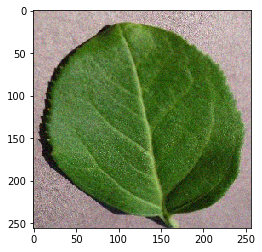

In [5]:
path = '/media/lingang/d/chris/graduate_thesis/dataset/plant_disease_b_0255/test_data_noise_5_10.h5'
with h5py.File(path, 'r') as f_name:
    x = f_name['X']
    ans = x[0]
    img = np.zeros([256, 256, 3], dtype=np.uint8)
    img[:,:,0] = ans[0,:,:]
    img[:,:,1] = ans[1,:,:]
    img[:,:,2] = ans[2,:,:]
    plt.imshow(img)
    